In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [0]:
url_votes = 'https://raw.githubusercontent.com/exemplary-citizen/PCA-and-Senate-Voting-Data/master/senator_pca_problem/senator_data_pca/'
senator_df =  pd.read_csv(url_votes + 'data_matrix.csv',error_bad_lines=False)
af = pd.read_csv(url_votes + 'politician_labels.txt', header=None)
af["affiliations"] = af[0].str.split().str[-1]

In [0]:
senator_df

,Unnamed: 0,bill_type bill_name bill_ID,missing_votes,Arlen Specter (PA),Barack H. Obama (IL),BarbaraA Mikulski(MD),BarbaraBoxer(CA),Bill Nelson(FL),BlancheL.Lincoln(AR),ByronL.Dorgan(ND),C.SaxbyChambliss(GA),CarlLevin(MI),CharlesE.'Chuck' Grassley(IA),CharlesE.'Chuck'Schumer(NY),CharlesT.'Chuck' Hagel(NE),ChristopherJ.Dodd(CT),ChristopherS.'Kit'Bond(MO),ConradR.Burns(MT),CraigThomas(WY),DanielK.Inouye(HI),DanielKahikinaAkaka(HI),DavidB.Vitter (LA),DebbieAnnStabenow(MI),DianneFeinstein(CA),E. Benjamin'Ben'Nelson(NE),EdwardM.'Ted'Kennedy(MA),ElizabethH.Dole(NC),EvanBayh(IN),FrankR.Lautenberg(NJ),GeorgeFelixAllen(VA),GeorgeV.Voinovich(OH),GordonHaroldSmith(OR),HarryM.Reid(NV),HerbertH.’Herb'Kohl(WI),HillaryRodhamClinton(NY),JamesM.'Jim'Inhofe(OK),JamesM.'Jim'Talent(MO),JamesMerrill'Jim'Jeffords(VT),JeffBingaman(NM),JeffersonB.'Jeff'SessionsIII(AL),...,LisaA.Murkowski(AK),MariaCantwell(WA),MarkDayton(MN),MarkPryor(AR),MaryL.Landrieu(LA),MaxS.Baucus(MT),MelMartinez(FL),MichaelB.Enzi(WY),MichaelD.'Mike'Crapo(ID),Michael'Mike'DeWine(OH),MitchMcConnell(KY),NormColeman(MN),OlympiaJ.Snowe(ME),OrrinG.Hatch(UT),PatRoberts(KS),PatrickJ.Leahy(VT),PattyMurray(WA),PaulS.Sarbanes(MD),PeteV.Domenici(NM),RichardC.Shelby(AL),RichardG.Lugar(IN),RichardJ.'Dick'Durbin(IL),RichardJ.'Rick'Santorum(PA),RichardM.Burr(NC),RobertC.Byrd(WV),RobertF.Bennett(UT),RobertMenendez(NJ),RonWyden(OR),RussellD.Feingold (WI),SamuelD.'Sam'Brownback(KS),SusanM.Collins(ME),TedStevens(AK),ThadCochran(MS),ThomasAllen'Tom'Coburn(OK),ThomasRichardCarper(DE),Thomas'Tom'Harkin(IA),TimP.Johnson(SD),TrentLott(MS),WayneA.Allard(CO),WilliamH.'Bill'Frist(TN)
0,0,Appropriations_Transit Security Amendment_3866,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
1,1,Budget_Spending_and_Taxes_2007 Budget Resoluti...,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
2,2,"""Budget, Spending and Taxes_Debt Limit Increas...",0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
3,3,"""Budget, Spending and Taxes_Education Funding ...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
4,4,"Budget, Spending and Taxes_Reinstate Pay-As-Yo...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [0]:
X = np.array(senator_df.values[:,3:].T, dtype= 'float64')

In [0]:
X[0,:]

array([ 1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
        1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  0., -1.,  1.,
        1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
        1., -1.,  1.,  0.,  0.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  0., -1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1

Center the data


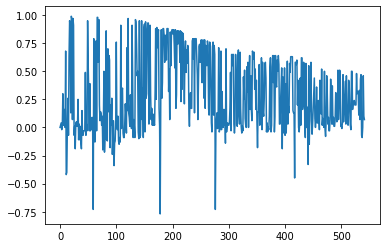

In [0]:
Xmean=np.mean(X, axis=0) #we find the mean across each row for each bill 
plt.plot(Xmean)
plt.show()

In [0]:
Xmean.shape

(542,)

In [0]:
Xoriginal=X.copy()
X = X - np.mean(X,axis=0)

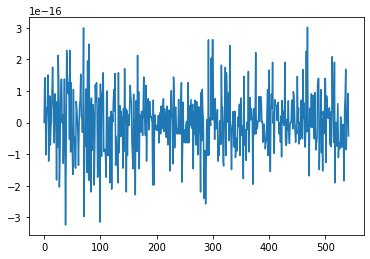

In [0]:
plt.plot(np.mean(X, axis=0))
plt.show()

In [0]:
X.shape

(100, 542)

In [0]:
affiliations=af["affiliations"]

In [0]:
affiliations.shape

(100,)

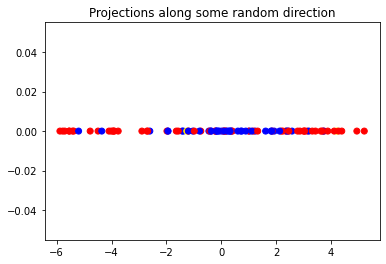

In [0]:
#No intuitiveness
v_random = np.random.rand(542,1)
v_random = v_random/np.linalg.norm(v_random)
scores_random= np.matmul(X, v_random)

plt.scatter(scores_random, np.zeros_like(scores_random), c = affiliations)
plt.title("Projections along some random direction")
plt.show()

In [0]:
from sklearn.decomposition import PCA

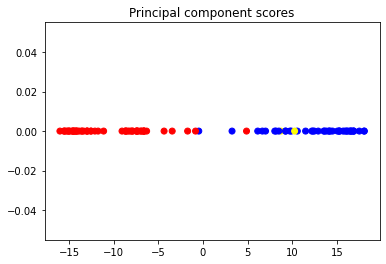

In [0]:
pca= PCA(n_components=1) #the highest eigen vector
pca.fit(X)
v_1=pca.components_.T
scores_v1= np.matmul(X,v_1)
plt.scatter(scores_v1, np.zeros_like(scores_v1), c = affiliations)
plt.title("Principal component scores")
plt.show()


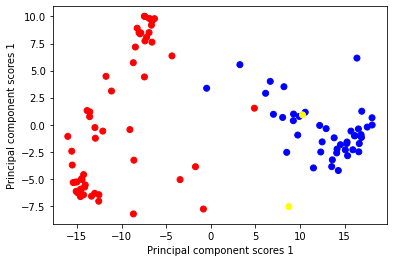

In [0]:
pca= PCA(n_components=2) #the two highest eigen vector
scores_v12 = pca.fit_transform(X)
plt.scatter(scores_v12[:,0], scores_v12[:,1], c = affiliations)
plt.xlabel("Principal component scores 1")
plt.ylabel("Principal component scores 1")
plt.show()

In [0]:
repub = np.where(affiliations=='Red')
repub = np.squeeze(repub)
print(repub)

[ 0  7  9 11 13 14 15 18 23 26 27 28 32 33 36 37 38 39 41 42 45 46 47 48
 49 52 53 56 57 58 59 60 66 67 68 69 70 71 72 73 74 78 79 80 82 83 85 89
 90 91 92 93 97 98 99]


In [0]:
senator_id= np.where(scores_v12[repub,0]>=0)
print(repub[senator_id])

[58]


In [0]:
print(af[0][repub[senator_id]])

58    Chafee Red
Name: 0, dtype: object


Another example on auto encoders using the dataset "Labeled dataset in the wild"

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people= fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [0]:
n_samples, h, w = lfw_people.images.shape

In [4]:
print(n_samples, h, w)

1288 50 37


In [0]:
target_names = lfw_people.target_names
n_classes = target_names.shape[0]


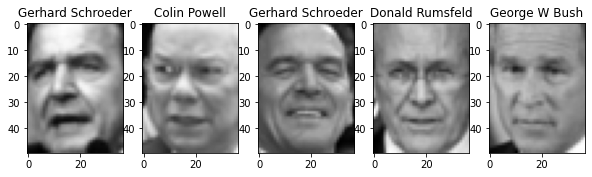

In [6]:
def plot_face(x):
  h=50
  w=37
  plt.imshow(x.reshape((h,w)), cmap=plt.cm.gray)

x=lfw_people.data
y=lfw_people.target
I= np.random.permutation(n_samples)
# print(I)
plt.figure(figsize=(10,20))
nplt=5
for i in range (nplt):
  ind=I[i]
  plt.subplot(1, nplt, i+1)
  plot_face(x[ind])
  plt.title(target_names[y[ind]])

In [7]:
print(target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [0]:
Xmean=np.mean(x,axis=0)
Xs= x-Xmean[None, :]

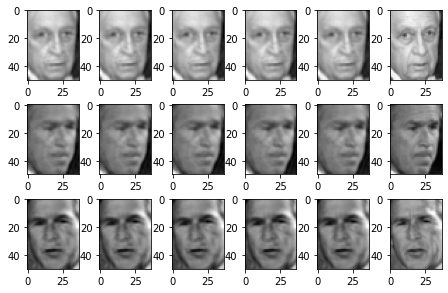

In [15]:
nplt=3
pcs=[5,10,50, 100, 200]
kmax= np.max(pcs)

pca= PCA(n_components=kmax, svd_solver='randomized', whiten=True)
pca.fit(x)
Z = pca.transform(x)
inds= np.random.permutation(n_samples)
inds= inds[:nplt]
nk=len(pcs)

plt.subplots_adjust(bottom=0, left= 0.01, right=0.99, top= 0.9, hspace=0.35 )

iplt= 0
for ind in inds:
  for k in pcs:
    plt.subplot(nplt, nk+1, iplt+1)
    Zd= np.copy(Z[ind,:])
    Zd[k:0]=0
    Xhati = pca.inverse_transform(Zd)

    plot_face(Xhati)
    iplt+=1

  plt.subplot(nplt,nk+1,iplt+1)
  plot_face(x[ind,:])
  iplt+=1

